In [3]:
import pandas as pd
df = pd.read_csv(r'merged_dataset.csv') 

In [4]:
print(df.head()) 


                                               tweet  new_sentiment
0  when modi promised “minimum government maximum...           -1.0
1  talk all the nonsense and continue all the dra...            0.0
2  what did just say vote for modi  welcome bjp t...            1.0
3  asking his supporters prefix chowkidar their n...            1.0
4  answer who among these the most powerful world...            1.0


In [5]:
print(df.tail(30)) 

                                                     tweet  new_sentiment
3305353  HealthStream, Inc. $HSTM Short Interest Down 1...            1.0
3305354  $SPY $QQQ $IWM $AAPL &lt;smh&gt;  Gonna go gre...            1.0
3305355  RT @hyumialert: [ $SPY $QQQ $IWM $SPX $NDX $RU...            1.0
3305356  #UNILEVER https://t.co/ZTIcvYqTx7 Pot. interme...            1.0
3305357  $566.85 Million in Sales Expected for Nabors I...            1.0
3305358  @TheDomino @AndrewFactor @CNBC Crazy, right?!?...            1.0
3305359  #Stocks making the biggest moves in the premar...            1.0
3305360  RT @leadlagreport: Buying The Dip Is NOT An In...            1.0
3305361  @TurnerNovak Only difference is $FB was at an ...            1.0
3305362  1st Source Co. $SRCE Short Interest Update htt...            1.0
3305363  All these puts printing \n\n$spy $nugt $jpm $c...            1.0
3305364  RT @CarterBWorth: The mkt's been at current le...            1.0
3305365  RT @MacroCharts: Amazon $AMZN

In [6]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305383 entries, 0 to 3305382
Data columns (total 2 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tweet          object 
 1   new_sentiment  float64
dtypes: float64(1), object(1)
memory usage: 50.4+ MB
None


In [7]:
print(df['new_sentiment'].value_counts())  


new_sentiment
 0.0    1616824
-1.0    1605577
 1.0      82975
Name: count, dtype: int64


In [8]:
df.isnull().sum()


tweet            4
new_sentiment    7
dtype: int64

In [9]:
df.dropna( inplace=True)


In [10]:
df.isnull().sum()


tweet            0
new_sentiment    0
dtype: int64

C:\Users\kgadg\AppData\Local\Temp\ipykernel_25312\3987304729.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['new_sentiment'], palette="muted")


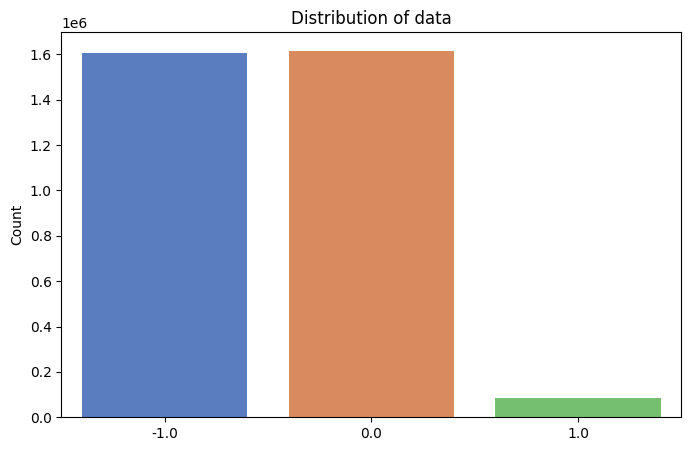

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=df['new_sentiment'], palette="muted")

# Add labels and title
plt.title("Distribution of data")
plt.xlabel("")
plt.ylabel("Count")

# Show the plot
plt.show()

In [12]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text

df['clean_tweet'] = df['tweet'].astype(str).apply(clean_text)


In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

df['processed_tweet'] = df['clean_tweet'].apply(preprocess_text)

# Display processed data
print(df[['tweet', 'processed_tweet', 'new_sentiment']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kgadg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kgadg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kgadg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               tweet  \
0  when modi promised “minimum government maximum...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                     processed_tweet  new_sentiment  
0  modi promised minimum government maximum gover...           -1.0  
1             talk nonsense continue drama vote modi            0.0  
2  say vote modi welcome bjp told rahul main camp...            1.0  
3  asking supporter prefix chowkidar name modi gr...            1.0  
4  answer among powerful world leader today trump...            1.0  


In [15]:
df.to_csv("processed_twitter_data.csv", index=False)
print("Preprocessed dataset saved successfully!")


Preprocessed dataset saved successfully!


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Consider top 5000 words

# Transform text data
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_tweet'])

print("TF-IDF feature shape:", X_tfidf.shape)  # Check dimensions


TF-IDF feature shape: (3305372, 5000)


In [21]:
!pip install --upgrade numpy
!pip install --upgrade gensim


  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from gensim.models import Word2Vec

# Convert tweets into tokenized word lists
sentences = [tweet.split() for tweet in df['processed_tweet']]

# Train Word2Vec Model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Generate word vectors for each tweet
def get_w2v_vector(text):
    words = text.split()
    vector = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return sum(vector) / len(vector) if vector else [0] * 100  # Handle empty tweets

df['w2v_features'] = df['processed_tweet'].apply(get_w2v_vector)

print("Word2Vec feature extraction done!")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [24]:
from sklearn.model_selection import train_test_split

# Define feature matrix (X) and target variable (y)
X = X_tfidf  # Or use Word2Vec features
y = df['new_sentiment']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets!")


Data split into training and testing sets!


 Step 6: Model Selection & Training

In [25]:
# (a) Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7591105396513255


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# (b) Train Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


KeyboardInterrupt: 

In [29]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.7 MB/s eta 0:01:15
   ---------------------------------------- 1.0/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 1.3/124.9 MB 1.9 MB/s eta 0:01:05
    --------------------------------------- 1.8/124.9 MB 2.1 MB/s eta 0:00:59
    --------------------------------------- 2.6/124.9 MB 2.3 MB/s eta 0:00:54
   - -------------------------------------- 3.1/124.9 MB 2.4 MB/s eta 0:00:51
   - -------------------------------------- 3.9/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 4.7/124.9 MB 2.7 MB/s eta 0:00:46
   - -------------------------------------- 5.2/124.9 MB 2.7 MB/s eta 0:00:45
   - -------------------------------------- 5.8/124.9 MB 2.7 MB/s eta 0:00:45
   -- ------------------------------------- 6.6/124.9 MB 2.7 MB/s eta 0:00:44



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# (c) Train XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Shift labels from [-1, 0, 1] to [0, 1, 2]
y_train_shifted = y_train + 1
y_test_shifted = y_test + 1

# Train XGBoost Model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train_shifted)

# Predict & shift back the labels
y_pred_xgb = model_xgb.predict(X_test) - 1

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.733225428279696


In [34]:
# Step 7: Train Deep Learning Models
# Try LSTM (Long Short-Term Memory) and BERT for improved accuracy.
# (a) Train LSTM Model
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(3, activation='softmax')  # 3 classes: Positive, Negative, Neutral
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train_shifted, epochs=5, batch_size=64, validation_data=(X_test, y_test_shifted))


Epoch 1/5
    7/41318 ━━━━━━━━━━━━━━━━━━━━ 406:29:47 35s/step - accuracy: 0.4711 - loss: 0.9894

KeyboardInterrupt: 

In [36]:
!pip install transformers


  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.29.1-py3-none-any.whl.metadata (13 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.0 MB 1.4 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/10.0 MB 1.4 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/10.0 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/10.0 MB 1.7 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/10.0 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/10.0 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/10.0 MB 1.7 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/10.0 MB 1.3 MB/s eta 0:00:06
   --------- ----------------------------


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install tf-keras



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 2.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 2.1 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 2.1 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 996.8 kB/s eta 0:00:00


In [39]:
# (b) Train Transformer Model (BERT)
from transformers import BertTokenizer, TFBertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

X_train_tokens = tokenizer(list(X_train), truncation=True, padding=True, max_length=512, return_tensors="tf")
X_test_tokens = tokenizer(list(X_test), truncation=True, padding=True, max_length=512, return_tensors="tf")

model_bert.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_bert.fit(X_train_tokens, y_train, epochs=3, batch_size=32, validation_data=(X_test_tokens, y_test))


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kgadg\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [40]:
import numpy as np
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lr', model_lr),
    ('xgb', model_xgb)
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_voting))


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.7595779601406799


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))


Classification Report:
               precision    recall  f1-score   support

        -1.0       0.75      0.78      0.77    321299
         0.0       0.76      0.75      0.76    323288
         1.0       0.86      0.49      0.62     16488

    accuracy                           0.76    661075
   macro avg       0.79      0.67      0.72    661075
weighted avg       0.76      0.76      0.76    661075

Confusion Matrix:
 [[252109  68315    875]
 [ 80838 241980    470]
 [  2300   6139   8049]]
